# Importing Basic Libraries

In [1]:
# lets import the basic Libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for Interactive Shells
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

# Lets read the Dataset

In [2]:
# lets read the dataset
data = pd.read_csv('IMDB_Movies.csv')


In [3]:
# lets check the shape
print(data.shape)

(5043, 28)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
# lets remove unnecassary columns from the dataset

# Use the 'drop()' function to drop the unnecessary columns

data = data.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes',  
                      'facenumber_in_poster', 
                      'content_rating', 
                      'country', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      ], 
                       axis = 1)


In [6]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

# Finding For missing values in each columns

In [7]:
data.isnull().sum().sort_values(ascending = False)

gross                     884
budget                    492
title_year                108
director_name             104
num_critic_for_reviews     50
actor_3_name               23
num_user_for_reviews       20
duration                   15
actor_2_name               13
language                   12
actor_1_name                7
genres                      0
movie_title                 0
num_voted_users             0
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [8]:
# Since 'gross' and 'budget' columns have large number of NaN values, drop all the rows with NaNs at this column using the
# 'isnan' function of NumPy along with a '~' 'not' symbol

data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

# Now lets again check the Missing Values column wise
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [9]:
# The rows for which the sum of Null is less than two are retained

data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [12]:
# lets replace the missing values with average value of that column

# using mean for numerical columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

# using mode for categorical column
data['language'].fillna(data['language'].mode()[0], inplace = True)

# As we know that We cannot use statistical values for imputing the missing values of actor names, so we will replace the 
# actor names with "Unknown Actor"

data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

# as we imputed all the missing values lets check the no. of total missing values in the dataset
data.isnull().sum().sum()

0

# Data Modification

In [10]:
# budget = amount spent by producer to produce movie
#gross = amount earn by producer via various platforms 
# Lets convert the gross and budget from 1$ to 1 Million$ format to make our analysis easier

data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [11]:
# lets create a Profit column using the Budget and Gross
#Profit = Gross - Budget

data['Profit'] = data['gross'] - data['budget']
# data['Profit']

# lets also check the name of Top 10 Profitable Movies
data[['Profit','movie_title']].sort_values(by = 'Profit', ascending  = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [14]:
# By looking at the above result we can easily analyze that there are some duplicate

# lets print the no. of rows before removing Duplicates
print("No. of Rows Before Removing Duplicates: ",data.shape[0])

# so lets remove all the duplicates from the data
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

# lets print the no. of rows after removing Duplicates
print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3888
No. of Rows After Removing Duplicates:  3853


In [15]:
# Lets check the Top 10 Profitable Movies Again

data[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [16]:
# lets check the values in the language column
data['language'].value_counts()

English       3670
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Hebrew           3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [17]:
#  it is better to keep only three languages that is English, Hindi and Foreign
def language(x):
    if x == 'English':
        return 'English'
    elif x == 'Hindi':
        return 'Hindi'
    else:
        return 'Foreign'

# lets apply the function on the language column
data['language'] = data['language'].apply(language)

# lets check the values again
data['language'].value_counts()

English    3670
Foreign     173
Hindi        10
Name: language, dtype: int64

In [19]:
# The Duration of Movies is not varying a lot but we know that most of the users either like watching long movies or short 
# duration movies. we can categorize the movies in two part i.e., short and long.

# lets define a function for categorizing Duration of Movies
def duration(x):
    if x <= 90:
        return 'Short'
    elif x>=90 and x<=120:
        return 'Medium'
    else:
        return 'Long'
    
# lets apply this function on the duration column
data['duration'] = data['duration'].apply(duration)

# lets check the values of Duration column
data['duration'].value_counts()
# data

Medium    2382
Long       918
Short      553
Name: duration, dtype: int64

In [20]:
# lets also check the values in the Genres Column

data['genres'].value_counts()

Drama                                     153
Comedy|Drama|Romance                      151
Comedy|Drama                              147
Comedy                                    145
Comedy|Romance                            135
                                         ... 
Action|Crime|Drama|Thriller|War             1
Adventure|Comedy|Family|Musical             1
Action|Adventure|Family|Fantasy|Sci-Fi      1
Action|Drama|Mystery|Thriller|War           1
Comedy|Crime|Horror                         1
Name: genres, Length: 762, dtype: int64

In [21]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [22]:
# we can see from the above output that most of the movies are having a lot of genres
# also, a movie can have so many genres so lets keep four genres

data['Moviegenres'] = data['genres'].str.split('|')  # create rows of list  based on spliteed geners
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0]) #here 1 represent the length of list which present in that row
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0]) #here 2 represent the length of list which present in that row
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0]) #here 3 represent the length of list which present in that row

# lets check the head of the  data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


In [23]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes', 'Profit',
       'Moviegenres', 'Genre1', 'Genre2', 'Genre3', 'Genre4'],
      dtype='object')

In [27]:
# Lets compare the Gross with Genres

# first group the genres and get max, min, and avg gross of the movies of that genre.)

display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

Most Profitable Years in Box Office


c:\paythone 3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


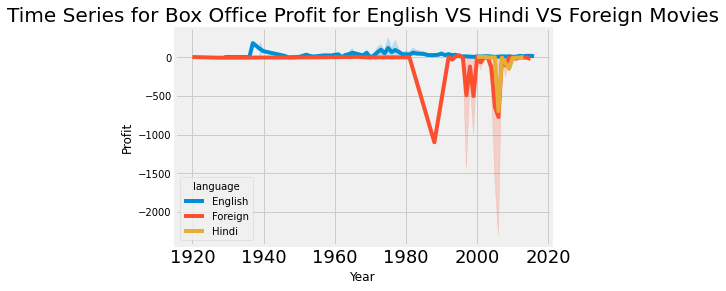

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3423,Akira,Foreign,-1099.560838
3859,Lady Vengeance,Foreign,-4199.788333


In [28]:
# lets convert year into integer
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']]
                                                .groupby(['language','title_year'])
                                                .agg('sum').
                                                sort_values(by = 'Profit',ascending = False)
                                                .head(10)
                                                .style.background_gradient(cmap = 'Blues'))

# lets plot them
sns.lineplot(data['title_year'], data['Profit'], hue = data['language']) # here we use seaborn line chart
plt.title('Time Series for Box Office Profit for English VS Hindi VS Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel('Year')
plt.show()

print("Movies that Made Huge Losses")
display(data[data['Profit'] < -1000][['movie_title',
                        'language','Profit']].style.background_gradient(cmap = 'Reds'))

# compare the Gross Vs. Duration

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Medium,434.949459,424.449459
812,Deadpool,Medium,363.024263,305.024263
521,Despicable Me 2,Medium,368.049635,292.049635
338,Finding Nemo,Medium,380.838870,286.838870
582,Shrek 2,Medium,436.471036,286.471036


,movie_title,duration,gross,Profit
509,The Lion King,Short,422.783777,377.783777
519,The Secret Life of Pets,Short,323.505540,248.505540
927,Shrek,Short,267.652016,207.652016
1747,Aladdin,Short,217.350219,189.350219
4449,Snow White and the Seven Dwarfs,Short,184.925485,182.925485


c:\paythone 3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gross Comparison')

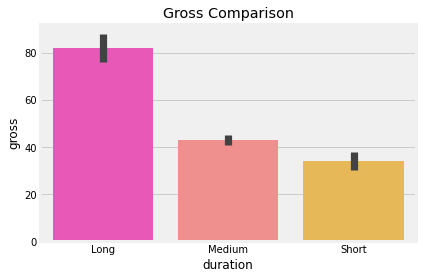

In [29]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross','Profit']]
                                        .sort_values(by = 'Profit',ascending = False)
                                        .head(5)
                                        .style
                                        .background_gradient(cmap = 'spring'))

display(data[data['duration'] == 'Medium'][['movie_title', 'duration', 'gross','Profit']]
                                        .sort_values(by = 'Profit',ascending = False)
                                        .head(5)
                                        .style
                                        .background_gradient(cmap = 'spring'))

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross','Profit']]
                                        .sort_values(by = 'Profit',ascending = False)
                                        .head(5)
                                        .style
                                        .background_gradient(cmap = 'spring'))

sns.barplot(data['duration'], data['gross'], palette = 'spring')
plt.title('Gross Comparison')

Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Medium Duration Movies is 6.34
Average IMDB Score for Short Duration Movies is 6.02

Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Medium Duration Movie
               movie_title  imdb_score
3175  American History X          8.6

Highest Rated Short Duration Movie
         movie_title  imdb_score
4427  Modern Times          8.6


c:\paythone 3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


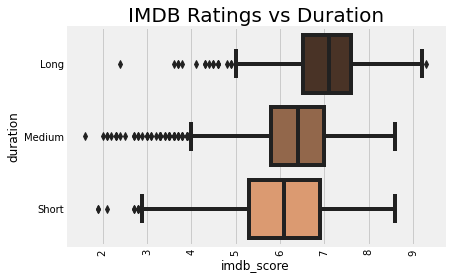

In [30]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Medium Duration Movies is {0:.2f}".format(data[data['duration'] == 'Medium']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

print("\nHighest Rated Long Duration Movie\n", 
    data[data['duration'] == 'Long'][['movie_title','imdb_score']]
      .sort_values(by = 'imdb_score', ascending = False)
      .head(1))
print("\nHighest Rated Medium Duration Movie\n", 
    data[data['duration'] == 'Medium'][['movie_title','imdb_score']]
      .sort_values(by = 'imdb_score', ascending = False)
      .head(1))

print("\nHighest Rated Short Duration Movie\n", 
    data[data['duration'] == 'Short'][['movie_title','imdb_score']]
      .sort_values(by = 'imdb_score', ascending = False)
      .head(1))

sns.boxplot(data['imdb_score'], data['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Duration', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

# Inspecting Actor by passing the name of actor

In [31]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'language',
       'imdb_score',
        ]]
    return y

In [32]:
query_actors('Johnny Depp')

,movie_title,budget,gross,title_year,genres,language,imdb_score
1,Pirates of the Caribbean: At World's End,300.0,309.404152,2007,Action|Adventure|Fantasy,English,7.1
13,Pirates of the Caribbean: Dead Man's Chest,225.0,423.032628,2006,Action|Adventure|Fantasy,English,7.3
14,The Lone Ranger,215.0,89.289910,2013,Action|Adventure|Western,English,6.5
18,Pirates of the Caribbean: On Stranger Tides,250.0,241.063875,2011,Action|Adventure|Fantasy,English,6.7
33,Alice in Wonderland,200.0,334.185206,2010,Adventure|Family|Fantasy,English,6.5
106,Alice Through the Looking Glass,170.0,76.846624,2016,Adventure|Family|Fantasy,English,6.4
118,Charlie and the Chocolate Factory,150.0,206.456431,2005,Adventure|Comedy|Family|Fantasy,English,6.7
134,Dark Shadows,100.0,79.711678,2012,Comedy|Fantasy|Horror,English,6.2
181,Rango,135.0,123.207194,2011,Adventure|Animation|Comedy|Family|Western,English,7.2
205,Pirates of the Caribbean: The Curse of the Bla...,140.0,305.388685,2003,Action|Adventure|Fantasy,English,8.1


# Making report for Actor

In [33]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print("Time:",y['title_year'].min(),"-", y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())

In [34]:
actors_report('Johnny Depp') # Calling above function for know report of an actor 

Time: 1984 - 2016
Max Gross : 423.03 Millions
Avg Gross : 96.93 Millions
Min Gross : 1.82 Millions
Number of 100 Million Movies : 10
Avg IMDB Score : 6.79
Most Common Genres:
 Action       9
Adventure    7
Biography    6
Drama        5
Comedy       4
Name: Genre1, dtype: int64


In [35]:
# Lets compare Brad Pitt, Leonardo Caprio and Tom Cruise

def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')


print("Number of Critics Reviews for Brad Pitt")
display(critically_acclaimed_actors('Brad Pitt'))

print("Number of Critics Reviews for Leonardo DiCaprio")
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print("Number of Critics Reviews for Tom Cruise")
display(critically_acclaimed_actors('Tom Cruise'))

Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Leonardo DiCaprio


7014

Number of Critics Reviews for Tom Cruise


6740

# Recommending Movies based on Languages

In [36]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)

In [37]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)

In [38]:
recommend_lang('Hindi')

,language,movie_title,imdb_score
3344,Hindi,My Name Is Khan,8.0
3510,Hindi,Veer-Zaara,7.9
4385,Hindi,The Lunchbox,7.8
4490,Hindi,Monsoon Wedding,7.4
3877,Hindi,Paa,7.2
3276,Hindi,Jab Tak Hai Jaan,6.9
4572,Hindi,Fiza,6.2
3075,Hindi,Kabhi Alvida Naa Kehna,6.0
3455,Hindi,Ta Ra Rum Pum,5.4
4593,Hindi,Chocolate: Deep Dark Secrets,4.8


In [39]:
def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

In [40]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


# Done!!

# In this Project, we successfully explore the data with various prospects.. thanx

**Author : Satish Bamroliya**